<a href="https://colab.research.google.com/github/chintyanm/ProjectStudent2/blob/main/Student_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Student Project 2 - Email Classification<h1>

<h>Objective: classify whether or not an email is spam.<h>

##Data Processing

In [ ]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/AGIT_Training/Colab_Notebooks/content/emails.csv')
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df.dtypes

Email No.     object
the            int64
to             int64
ect            int64
and            int64
               ...  
military       int64
allowing       int64
ff             int64
dry            int64
Prediction     int64
Length: 3002, dtype: object

In [ ]:
print("Column Names:" , df.columns)

Column Names: Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)


In [ ]:
print("DataFrame Index: ", df.index)

DataFrame Index:  RangeIndex(start=0, stop=5172, step=1)


In [ ]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [ ]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
# covariance: Ini mengembalikan co-variance antara kolom yang sesuai
df.cov()

<ipython-input-18-f064c232a5da>:2: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.cov()


,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
the,137.945235,95.490182,55.854461,59.733618,43.104784,58.272027,806.854931,23.886931,24.847668,191.515507,...,0.011090,0.177019,0.309180,1.494534,0.115047,0.211220,0.107629,11.163506,0.058778,-0.023564
to,95.490182,90.908132,50.482698,47.585079,34.896859,44.710868,748.533276,20.918400,23.119183,162.106759,...,0.013365,0.192762,0.259070,1.389019,0.085643,0.121370,0.082585,10.779920,0.066762,0.239181
ect,55.854461,50.482698,198.842192,23.262958,24.405573,15.639429,493.970035,9.477642,95.715311,81.130436,...,0.200398,0.088503,0.075824,0.494308,0.005963,-0.015063,0.004444,5.545821,0.003446,-0.772922
and,59.733618,47.585079,23.262958,36.553750,21.260151,30.496390,431.622451,12.436391,9.940142,101.921164,...,0.003294,0.126104,0.192582,0.872688,0.088443,0.070669,0.054421,6.727391,0.025194,0.313789
for,43.104784,34.896859,24.405573,21.260151,21.907283,19.870541,305.000247,10.013165,10.731442,68.829414,...,0.010976,0.039043,0.129016,0.569478,0.060579,0.043659,0.040878,3.917810,0.017503,-0.006588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
military,0.211220,0.121370,-0.015063,0.070669,0.043659,0.063176,1.358617,0.003894,0.005255,0.323070,...,-0.000033,-0.000083,0.000704,0.008251,0.000552,0.019295,0.000553,0.019126,0.000148,0.004088
allowing,0.107629,0.082585,0.004444,0.054421,0.040878,0.048894,0.665661,0.025760,-0.000486,0.192109,...,-0.000020,-0.000051,-0.000043,0.000762,0.001917,0.000553,0.005205,0.019298,-0.000028,0.000369
ff,11.163506,10.779920,5.545821,6.727391,3.917810,7.694550,113.087057,2.339731,2.212482,24.032425,...,0.001589,0.040909,0.042292,0.260149,0.030531,0.019126,0.019298,7.729530,0.013550,0.170934
dry,0.058778,0.066762,0.003446,0.025194,0.017503,0.016134,0.805913,0.012223,0.000411,0.147050,...,-0.000035,0.000686,-0.000074,0.001058,-0.000030,0.000148,-0.000028,0.013550,0.009621,-0.000279


##Logistic Regrassion

In [ ]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
x = df.iloc[:,1:3001]
y = df.iloc[:, -1].values

In [ ]:
import sklearn

from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import classification_report

# buat Logistic Regression model dengan SGD (Stochastic Gradient Descent)
# los function: log
logistic = SGDClassifier(loss="log")
print(logistic.get_params())

{'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'log', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [ ]:
# Train model
logistic.fit(x, y)

print(f"Model weights: {logistic.coef_}, bias: {logistic.intercept_}")

# test
y_pred = logistic.predict(x)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


Model weights: [[-126.76116798 -118.93060196  -98.77867773 ...   -3.2918424
   -44.10881396   -3.36042245]], bias: [435.12397108]


In [ ]:
# Print report dengan classification metrics
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      3672
           1       0.90      0.94      0.92      1500

    accuracy                           0.95      5172
   macro avg       0.94      0.95      0.94      5172
weighted avg       0.95      0.95      0.95      5172



In [ ]:
# confusion_matrix
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y, y_pred)
cnf_matrix

array([[3514,  158],
       [  88, 1412]])

Text(0.5, 427.9555555555555, 'Predicted label')

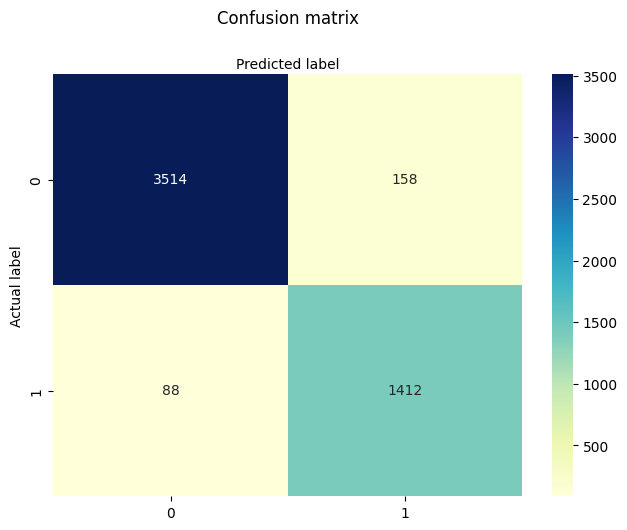

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


# heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
# accuracy, precision, and recall
print("Accuracy:", metrics.accuracy_score(y, y_pred))
print("Precision:", metrics.precision_score(y, y_pred))
print("Recall:", metrics.recall_score(y, y_pred))

Accuracy: 0.9524361948955916
Precision: 0.8993630573248408
Recall: 0.9413333333333334


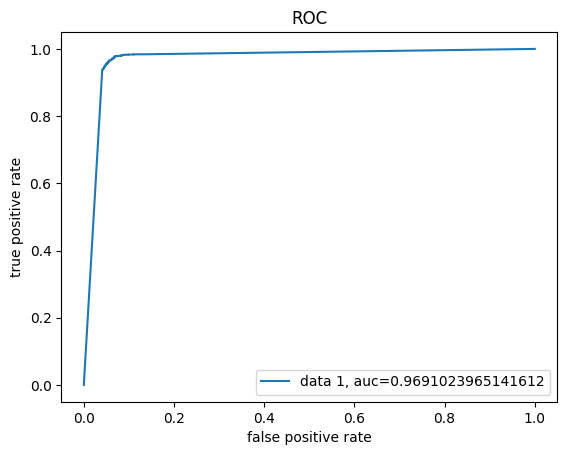

In [ ]:
y_pred_proba = logistic.predict_proba(x)[::,1]
fpr, tpr, _ = metrics.roc_curve(y,  y_pred_proba)
auc = metrics.roc_auc_score(y, y_pred_proba)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC')
plt.legend(loc=4)
plt.show()

##k-Nearest Neighbors

In [ ]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.3)

In [ ]:
from sklearn import neighbors

# Classifier untuk Nearest Neighbors
n_neighbors = 10
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
print(clf.get_params())

# Train model
clf.fit(trainX, trainY)

# Test
y_pred = clf.predict(testX)

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 10, 'p': 2, 'weights': 'uniform'}


[[993 100]
 [ 97 362]]


Text(0.5, 427.9555555555555, 'Predicted label')

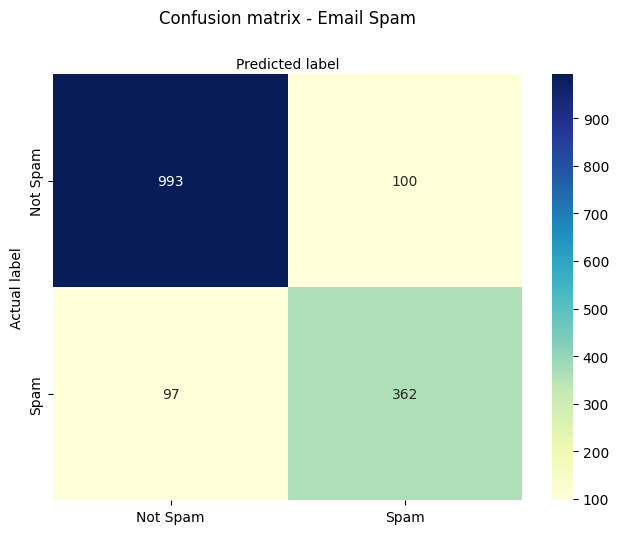

In [ ]:
# confusion_matrix
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(testY, y_pred)
print(cnf_matrix)

class_names=['Not Spam','Spam'] # name  of classes
fig, ax = plt.subplots()

# heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g', xticklabels=class_names,yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - Email Spam', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
     

In [ ]:
# accuracy, precision, dan recall
print("Accuracy:", metrics.accuracy_score(testY, y_pred))
print("Precision:", metrics.precision_score(testY, y_pred))
print("Recall:", metrics.recall_score(testY, y_pred))

Accuracy: 0.8730670103092784
Precision: 0.7835497835497836
Recall: 0.7886710239651417


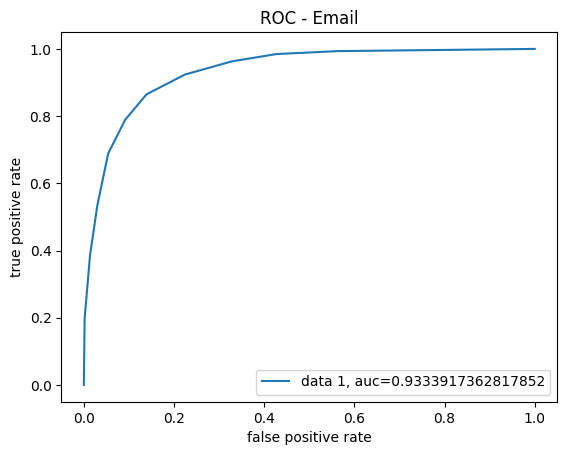

In [ ]:
# ROC
y_pred_proba = clf.predict_proba(testX)[::,1]
fpr, tpr, _ = metrics.roc_curve(testY,  y_pred_proba)
auc = metrics.roc_auc_score(testY, y_pred_proba)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC - Email')
plt.legend(loc=4)
plt.show()

##Decision Tree

In [ ]:
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.3)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Classifier untuk DecisionTreeClassifier
clf = DecisionTreeClassifier()
print(clf.get_params())

# Train model
clf.fit(trainX, trainY)

# Test
y_pred = clf.predict(testX)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


[[1050   65]
 [  42  395]]


Text(0.5, 427.9555555555555, 'Predicted label')

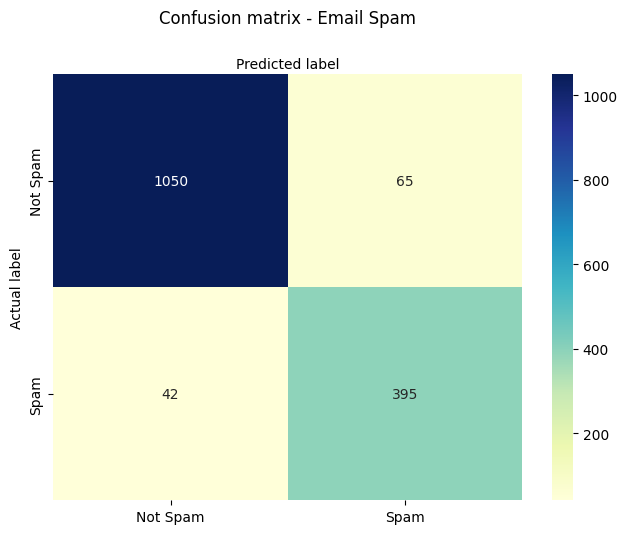

In [ ]:
# confusion_matrix
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(testY, y_pred)
print(cnf_matrix)

class_names=['Not Spam','Spam'] # name  of classes
fig, ax = plt.subplots()

# heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g', xticklabels=class_names,yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - Email Spam', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
# accuracy, precision, dan recall
print("Accuracy:", metrics.accuracy_score(testY, y_pred))
print("Precision:", metrics.precision_score(testY, y_pred))
print("Recall:", metrics.recall_score(testY, y_pred))

Accuracy: 0.9310567010309279
Precision: 0.8586956521739131
Recall: 0.9038901601830663


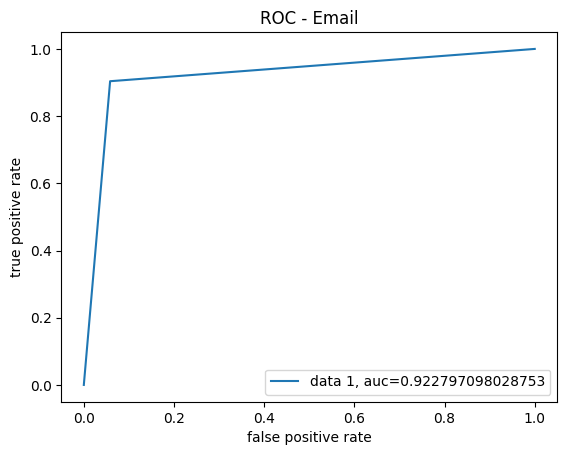

In [ ]:
# ROC
y_pred_proba = clf.predict_proba(testX)[::,1]
fpr, tpr, _ = metrics.roc_curve(testY,  y_pred_proba)
auc = metrics.roc_auc_score(testY, y_pred_proba)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC - Email')
plt.legend(loc=4)
plt.show()

##Support Vector Machine

In [ ]:
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.3)

In [ ]:
from sklearn.svm import SVC

# Classifier untuk SVC
clf = SVC(probability=True)
print(clf.get_params())

# Train model
clf.fit(trainX, trainY)

# Test
y_pred = clf.predict(testX)

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


[[1081   17]
 [ 307  147]]


Text(0.5, 427.9555555555555, 'Predicted label')

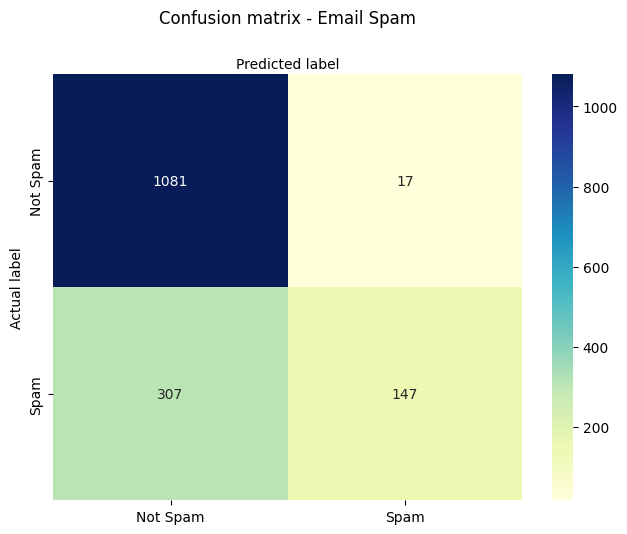

In [ ]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(testY, y_pred)
print(cnf_matrix)

class_names=['Not Spam','Spam'] # name  of classes
fig, ax = plt.subplots()

# heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g', xticklabels=class_names,yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - Email Spam', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
# accuracy, precision, dan recall
print("Accuracy:", metrics.accuracy_score(testY, y_pred))
print("Precision:", metrics.precision_score(testY, y_pred))
print("Recall:", metrics.recall_score(testY, y_pred))

Accuracy: 0.7912371134020618
Precision: 0.8963414634146342
Recall: 0.3237885462555066


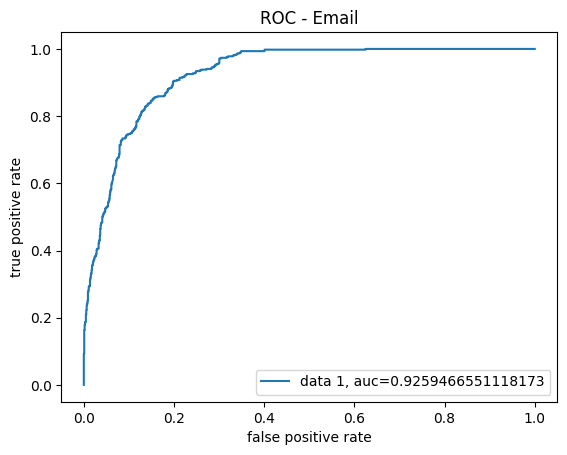

In [ ]:
# ROC
y_pred_proba = clf.predict_proba(testX)[::,1]
fpr, tpr, _ = metrics.roc_curve(testY,  y_pred_proba)
auc = metrics.roc_auc_score(testY, y_pred_proba)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC - Email')
plt.legend(loc=4)
plt.show()

##Naive Bayes

In [ ]:
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.3)

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Classifier untuk naive bayes
clf = GaussianNB()
print(clf.get_params())

# Train model
clf.fit(trainX, trainY)

# Test
y_pred = clf.predict(testX)

{'priors': None, 'var_smoothing': 1e-09}


[[1040   59]
 [  20  433]]


Text(0.5, 427.9555555555555, 'Predicted label')

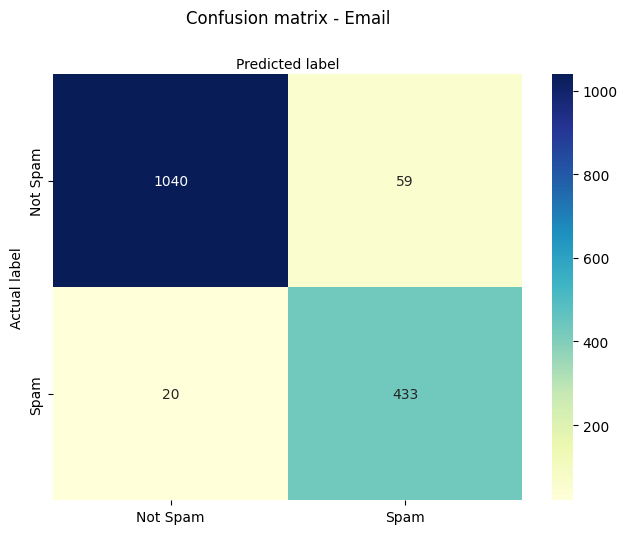

In [ ]:
# confusion_matrix
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(testY, y_pred)
print(cnf_matrix)

class_names=['Not Spam','Spam'] # name  of classes
fig, ax = plt.subplots()

# heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g', xticklabels=class_names,yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - Email', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
# accuracy, precision, dan recall
print("Accuracy:", metrics.accuracy_score(testY, y_pred))
print("Precision:", metrics.precision_score(testY, y_pred))
print("Recall:", metrics.recall_score(testY, y_pred))

Accuracy: 0.9490979381443299
Precision: 0.8800813008130082
Recall: 0.9558498896247241


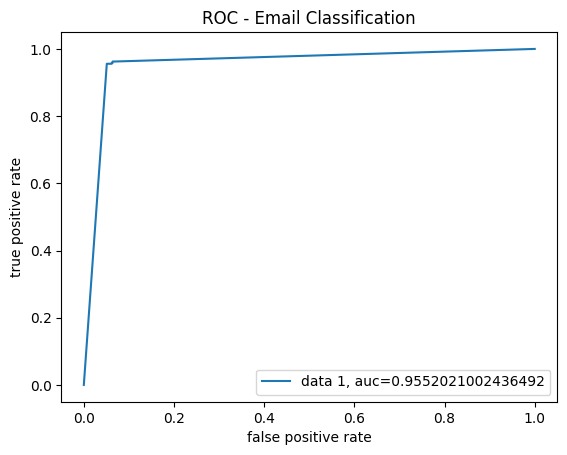

In [ ]:
# ROC
y_pred_proba = clf.predict_proba(testX)[::,1]
fpr, tpr, _ = metrics.roc_curve(testY,  y_pred_proba)
auc = metrics.roc_auc_score(testY, y_pred_proba)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC - Email Classification')
plt.legend(loc=4)
plt.show()

##Neural Network

In [ ]:
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.3)

In [ ]:
from sklearn.neural_network import MLPClassifier

# Classifier untuk MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(150,100,50),
                    max_iter = 100000,activation = 'relu',
                    solver = 'adam')
print(clf.get_params())

# Train model
clf.fit(trainX, trainY)

# Test
y_pred = clf.predict(testX)

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 100000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


[[1048   19]
 [  10  475]]


Text(0.5, 427.9555555555555, 'Predicted label')

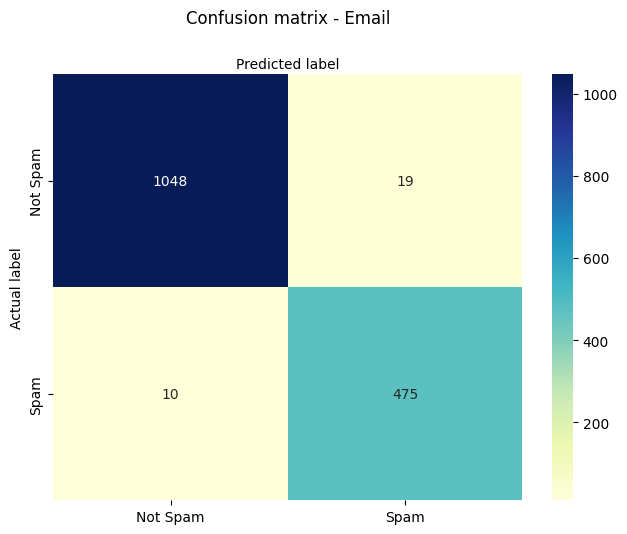

In [ ]:
# confusion_matrix
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(testY, y_pred)
print(cnf_matrix)

class_names=['Not Spam','Spam'] # name  of classes
fig, ax = plt.subplots()

# heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g', xticklabels=class_names,yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - Email', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
# accuracy, precision, dan recall
print("Accuracy:", metrics.accuracy_score(testY, y_pred))
print("Precision:", metrics.precision_score(testY, y_pred))
print("Recall:", metrics.recall_score(testY, y_pred))

Accuracy: 0.9813144329896907
Precision: 0.9615384615384616
Recall: 0.979381443298969


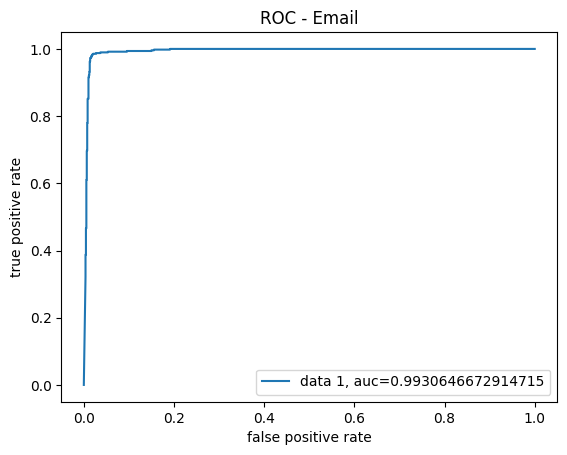

In [ ]:
# ROC
y_pred_proba = clf.predict_proba(testX)[::,1]
fpr, tpr, _ = metrics.roc_curve(testY,  y_pred_proba)
auc = metrics.roc_auc_score(testY, y_pred_proba)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC - Email')
plt.legend(loc=4)
plt.show()